# `SanUnit` (basic) <a class="anchor" id="top"></a>

- **Prepared by:**
    
    - [Yalin Li](https://qsdsan.readthedocs.io/en/latest/authors/Yalin_Li.html)

- **Covered topics:**

    - [1. Understanding SanUnit/sanunits/Unit](#s1)
    - [2. Using existing SanUnit subclasses](#s2)
    
- **Video demo:**

    - [Tori Morgan](https://qsdsan.readthedocs.io/en/latest/authors/Tori_Morgan.html)
    
To run tutorials in your browser, go to this [Binder page](https://mybinder.org/v2/gh/QSD-Group/QSDsan/main?filepath=%2Fdocs%2Fsource%2Ftutorials).

You can also watch a video demo on [YouTube](https://youtu.be/s9zr0rCX3UY) (subscriptions & likes appreciated!).

In [1]:
import qsdsan as qs
print(f'This tutorial was made with qsdsan v{qs.__version__}.')

This tutorial was made with qsdsan v0.3.5.


## 1. Understanding `SanUnit`/`sanunits`/`Unit` <a class="anchor" id="s1"></a>
The `SanUnit` class is used to model the design and operation of a unit operation through default or user-implemented algorithms. Upon simulation, it will generate the influent/effluent mass/energy flows and construction/operation inventories. It is (imo) the most extensible class in `qsdsan` and most directly relevant to new technologies.

In this tutorial, we will focus on how to use existing `SanUnit` classes, creation of new `SanUnit` subclasses will be covered in the [next tutorial](https://qsdsan.readthedocs.io/en/latest/tutorials/5_SanUnit_advanced.html).

### 1.1. `SanUnit` and `sanunits`

In [2]:
# In qsdsan's top-level diretory, you will see two entries related to SanUnit:
qs.SanUnit

qsdsan._sanunit.SanUnit

This means that `SanUnit` is a class in the `_sanunit` module (i.e., there is a file called `_sanunit.py` within the folder `qsdsan`).

`_sanunit.py` is the script that contains the codes used to develop the class `SanUnit`.

In `qsdsan`, `Equipment`/`equipments` (used to add equipment to a unit operation, discussed later in the advanced `SanUnit` tutorial) and `Process`/`processes` (used for dynamic simulation, will be discussed in a separate tutorial) also follow the same structure.

In [3]:
# If you check
qs.sanunits

<module 'qsdsan.sanunits' from '/Users/yalinli_cabbi/opt/anaconda3/envs/demo/lib/python3.8/site-packages/qsdsan/sanunits/__init__.py'>

As shown in the output, `sanunits` is actually a folder. This folder contains the unit operations (i.e., subclasses of `SanUint`) that have already been developed using `qsdsan`, and you can access them through `qs.sanunits.<SanUnitName>`

**Note:**

Usually, `<Hint>` are used to let readers know that they are supposed to replace whatever in the `<>` with their own inputs. So what I meant above is just that you'll want to replace the `<SanUnitName>` with the actual name of the unit operation, e.g., `qs.sanunits.PitLatrine`

---
### Tip
How did I know that `_sanunit.py` is a file/script but `sanunits` is a folder (other than the reason that I made them XD)?

In [4]:
# Because when you do
qs._sanunit

<module 'qsdsan._sanunit' from '/Users/yalinli_cabbi/opt/anaconda3/envs/demo/lib/python3.8/site-packages/qsdsan/_sanunit.py'>

It ends with `_sanunits.py`, but for `qs.sanunits`, it ends with `.../sanunits/__init__.py`

The `__init__.py` is a script used in Python to initialize the importing of other scripts within this folder (and you can also add some other codes in it, and those codes would be executed when you import the folder).

---

In [5]:
# If you put in `qs.sanunits.` in the cell/console and hit the tab key on your keyboard,
# you will see a list of the available unit operations you can use
# (all of them have been added as attributes to the `sanunits` module upon importing)

# Sometimes the list won't show up (e.g., your console is busy and takes a while to load),
# you can directly access the list by the `dir` function
dir(qs.sanunits)

['AnaerobicBaffledReactor',
 'AnaerobicDigestion',
 'BiogasCombustion',
 'CSTR',
 'ComponentSplitter',
 'CropApplication',
 'Decay',
 'DryingBed',
 'ElectrochemicalCell',
 'Excretion',
 'FakeSplitter',
 'FlatBottomCircularClarifier',
 'HXprocess',
 'HXutility',
 'Lagoon',
 'LiquidTreatmentBed',
 'LumpedCost',
 'MixTank',
 'Mixer',
 'PitLatrine',
 'Pump',
 'ReversedSplitter',
 'SBR',
 'SedimentationTank',
 'SludgeSeparator',
 'Splitter',
 'StorageTank',
 'Tank',
 'Toilet',
 'Trucking',
 'UDDT',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_anaerobic_baffled_reactor',
 '_anaerobic_digestion',
 '_biogas_combustion',
 '_bst_units',
 '_clarifier',
 '_component_splitter',
 '_crop_application',
 '_decay',
 '_drying_bed',
 '_electrochemical_cell',
 '_excretion',
 '_lagoon',
 '_liquid_treatment_bed',
 '_lumped_cost',
 '_pit_latrine',
 '_sedimentation_tank',
 '_sludge_separator',
 '_suspended_growth_b

Note that there's more to how `dir` works, to know more, check the [documentation](https://docs.python.org/3/library/functions.html#dir).

---
### Tip
Now you might be wondering about the other entries are. Attributes with leading and trailing double underscores (`dunder`) are Python builtin attributes, for example

In [6]:
# Recall that in previous tutorials we used the `__path__` attribute to look at
# where the imported qsdsan was
qs.sanunits.__path__

['/Users/yalinli_cabbi/opt/anaconda3/envs/demo/lib/python3.8/site-packages/qsdsan/sanunits']

Attributes that start with one underscore are private attributes and by default "hidden", (i.e., if you hit the tab key, they won't be included in the list).

These are the attributes that developers don't think user need to/want users to know, that's why the script that contains the codes used to develop the `SanUnit` class is named `_sanunit.py` with a leading underscore - the users don't need to know about the existence of this module, they can just use the `SanUnit` class.

---

## 1.2. `SanUnit` and `Unit`

In [7]:
# As always, we learn how to use a class by looking at its documentation
?qs.SanUnit

You can see that `SanUnit` is a subclass with the `Unit` class in `biosteam`, like we mentioned in the previous tutorials, this means it inherits the attributes of the `Unit` class while having some new features (e.g., enables dynamic simulation, supports comprehensive LCA).

In `qsdsan`, if a class is inherited from a `biosteam` (e.g., `SanUnit` from `Unit`)/`thermosteam` (e.g., `WasteStream` from `Stream`) class, the class-level document will only display the new features, but the documentation of the attributes from the superclasses is still accessible.

In [8]:
# E.g., `simulation` is a method inherited from the `Unit` class and you can still see the documentation
# you can actually see the hint on whether the attribute is inherited in the documentation
?qs.SanUnit.simulate

In [9]:
# In the case you can't remember what the superclass is, you can do
qs.SanUnit.__bases__

(biosteam._unit.Unit,)

Note that the `__bases__` attribute is a tuple, this is because one class can have multiple superclasses, in the case of `SanUnit`, there is only one

In [10]:
# But in the case of the `Toilet` class, there are two
qs.sanunits.Toilet.__bases__

(qsdsan._sanunit.SanUnit, qsdsan.sanunits._decay.Decay)

[Back to top](#top)

## 2. Using existing `SanUnit` subclasses <a class="anchor" id="s2"></a>
In Python terms, the "use" here means creating instances of a `SanUnit` subclass.

### 2.1. Instance initialization (creation) and simulation

In [11]:
# Like always, we need to firstly tell `qsdsan` what components we will be working with,
# for demo purpose we will just use the default ones
cmps = qs.Components.load_default()
qs.set_thermo(cmps)
cmps

CompiledComponents([S_H2, S_CH4, S_CH3OH, S_Ac, S_Prop, S_F, S_U_Inf, S_U_E, C_B_Subst, C_B_BAP, C_B_UAP, C_U_Inf, X_B_Subst, X_OHO_PHA, X_GAO_PHA, X_PAO_PHA, X_GAO_Gly, X_PAO_Gly, X_OHO, X_AOO, X_NOO, X_AMO, X_PAO, X_MEOLO, X_FO, X_ACO, X_HMO, X_PRO, X_U_Inf, X_U_OHO_E, X_U_PAO_E, X_Ig_ISS, X_MgCO3, X_CaCO3, X_MAP, X_HAP, X_HDP, X_FePO4, X_AlPO4, X_AlOH, X_FeOH, X_PAO_PP_Lo, X_PAO_PP_Hi, S_NH4, S_NO2, S_NO3, S_PO4, S_K, S_Ca, S_Mg, S_CO3, S_N2, S_O2, S_CAT, S_AN, H2O])


Let's firstly try using a `Mixer`, it is one of the most basic units, it takes N numbers of influents and the effluent is the mixture of all influents.

In [12]:
# Make three random influents, I'm deliberately using different ways to make these streams
# as a recap previous tutorials

# Method 1: by directly providing the flow rates of select components
ins1 = qs.WasteStream(H2O=100)

# Method 2: using `copy` and adjust flow rates later
ins2 = ins1.copy()
ins2.imol['X_GAO_Gly'] = ins2.imol['X_GAO_PHA'] = 0.01

# Method 3: using default models
ins3 = qs.WasteStream.codstates_inf_model('', flow_tot=50)

/Users/yalinli_cabbi/opt/anaconda3/envs/demo/lib/python3.8/site-packages/qsdsan/_waste_stream.py:857: UserWarning: ignored concentration specified for H2O:0.0
  warn(f'ignored concentration specified for {bulk_liquid_ID}:{C_h2o}')


In [13]:
# Use a shorthand to make our lives easier
su = qs.sanunits

# This is the actual line used to initialize the instance,
# and we can pass the influents through the `ins` argument
M1 = su.Mixer(ins=(ins1, ins2, ins3))

In [14]:
# Like many other classes, there is a `show` method
M1.show()

Mixer: M1
ins...
[0] ws1
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): H2O  1e+05
    WasteStream-specific properties:
     pH         : 7.0
[1] ws2
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): X_GAO_PHA  10
                 X_GAO_Gly  10
                 H2O        1e+05
    WasteStream-specific properties:
     pH         : 7.0
     COD        : 198.9 mg/L
     BOD        : 115.4 mg/L
     TC         : 70.5 mg/L
     TOC        : 70.5 mg/L
[2] ws3
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): S_F        4.3
                 S_U_Inf    1.08
                 C_B_Subst  2
                 X_B_Subst  11.3
                 X_U_Inf    2.79
                 X_Ig_ISS   2.62
                 S_NH4      1.25
                 S_PO4      0.4
                 S_K        1.4
                 S_Ca       7
                 S_Mg       2.5
                 S_CO3      6
                 S_N2       0.9
                 S_CAT      0.15
                 S_AN       0

**Hold on a second, why the effluent is empty?!!!** 😱😱😱

In [15]:
# Well, we have to simulate the unit first
M1.simulate()
M1.show()

Mixer: M1
ins...
[0] ws1
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): H2O  1e+05
    WasteStream-specific properties:
     pH         : 7.0
[1] ws2
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): X_GAO_PHA  10
                 X_GAO_Gly  10
                 H2O        1e+05
    WasteStream-specific properties:
     pH         : 7.0
     COD        : 198.9 mg/L
     BOD        : 115.4 mg/L
     TC         : 70.5 mg/L
     TOC        : 70.5 mg/L
[2] ws3
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): S_F        4.3
                 S_U_Inf    1.08
                 C_B_Subst  2
                 X_B_Subst  11.3
                 X_U_Inf    2.79
                 X_Ig_ISS   2.62
                 S_NH4      1.25
                 S_PO4      0.4
                 S_K        1.4
                 S_Ca       7
                 S_Mg       2.5
                 S_CO3      6
                 S_N2       0.9
                 S_CAT      0.15
                 S_AN       0

Aha! Now we are seeing the effluent being simulated.

In [16]:
# If you recall the `mix_from` method of `WasteStream`,
# effluent of the `Mixer` is actually generated by it
ws4 = qs.WasteStream()
ws4.mix_from(M1.ins)

In [17]:
# We can check if the flow rate of ws4 is the same as the effluent of the mixer M1
ws4.mass == M1.outs[0].mass

property_array([ True,  True,  True,  True,  True,  True,  True,  True,
                 True,  True,  True,  True,  True,  True,  True,  True,
                 True,  True,  True,  True,  True,  True,  True,  True,
                 True,  True,  True,  True,  True,  True,  True,  True,
                 True,  True,  True,  True,  True,  True,  True,  True,
                 True,  True,  True,  True,  True,  True,  True,  True,
                 True,  True,  True,  True,  True,  True,  True,  True]))

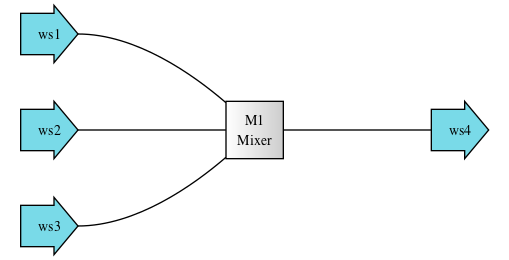

In [18]:
# As you can see in the above examples,
# I use `ins` and `outs` to set/retrieve the influents and effluents of a unit
# Alternatively, there is the `diagram` method for a more intuitive look
M1.diagram()

---
### HUGE Tip
If you cannot get a diagram from the `diagram` method, you probably don't have the `graphviz` package, which is used to generate the diagram, for more information, check QSDsan's documentation on [this issue](https://qsdsan.readthedocs.io/en/latest/FAQ.html#graphviz)

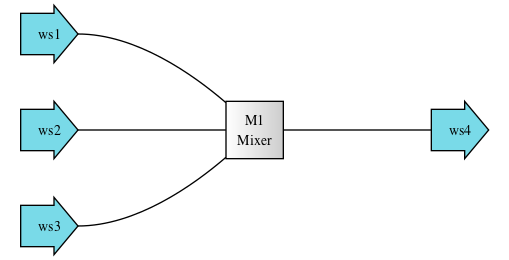

In [19]:
# Do the following to confirm that it is indeed `graphviz` causing the problem
import biosteam as bst
bst.RAISE_GRAPHVIZ_EXCEPTION = True
M1.diagram()

# If you can see error message now, then it's definitely `graphvize`, check the link above to fix it

---

### 2.2. Retrieving design and cost

In [20]:
# Note that `Mixer` does nothing other than mix the influents,
# let's using another example
qs.set_thermo(cmps) # here we need to reset the `cmps` since I introduced the `biosteam` environment
M2 = su.MixTank('M2', ins=(ins1, ins2, ins3), outs='M2out', # init_with='WasteStream',
                tau=1, kW_per_m3=1)
M2.show()

/var/folders/m0/nkxljwvx1nlg1hw9npshjgm40000gn/T/ipykernel_25930/3311111030.py:4: RuntimeWarning: undocked inlet stream ws1 from unit M1; ws1 is now docked at M2
  M2 = su.MixTank('M2', ins=(ins1, ins2, ins3), outs='M2out', # init_with='WasteStream',
/var/folders/m0/nkxljwvx1nlg1hw9npshjgm40000gn/T/ipykernel_25930/3311111030.py:4: RuntimeWarning: undocked inlet stream ws2 from unit M1; ws2 is now docked at M2
  M2 = su.MixTank('M2', ins=(ins1, ins2, ins3), outs='M2out', # init_with='WasteStream',
/var/folders/m0/nkxljwvx1nlg1hw9npshjgm40000gn/T/ipykernel_25930/3311111030.py:4: RuntimeWarning: undocked inlet stream ws3 from unit M1; ws3 is now docked at M2
  M2 = su.MixTank('M2', ins=(ins1, ins2, ins3), outs='M2out', # init_with='WasteStream',


MixTank: M2
ins...
[0] ws1
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): H2O  1e+05
    WasteStream-specific properties:
     pH         : 7.0
[1] ws2
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): X_GAO_PHA  10
                 X_GAO_Gly  10
                 H2O        1e+05
    WasteStream-specific properties:
     pH         : 7.0
     COD        : 198.9 mg/L
     BOD        : 115.4 mg/L
     TC         : 70.5 mg/L
     TOC        : 70.5 mg/L
[2] ws3
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (g/hr): S_F        4.3
                 S_U_Inf    1.08
                 C_B_Subst  2
                 X_B_Subst  11.3
                 X_U_Inf    2.79
                 X_Ig_ISS   2.62
                 S_NH4      1.25
                 S_PO4      0.4
                 S_K        1.4
                 S_Ca       7
                 S_Mg       2.5
                 S_CO3      6
                 S_N2       0.9
                 S_CAT      0.15
                 S_AN      

Two things to take note of in the example above:
- By setting `outs='M2out'`, I set the ID of the effluent to be `M2out`
    - You can also make a stream ahead of time and set the effluent to that stream (e.g., `outs=qs.WasteStream('M2out')`
    - If the unit has multiple effluents, then you'll want to use an Iterable (e.g., tuple, list), e.g., `outs=['M2out1', qs.WasteStream('M2out2')]`
    - This is applicable to `ins` as well
- You will see warnings about streams being undocked from the previous unit and docked at the new unit, this is because we set the `ins` of `M2` to be the same as the `ins` of `M1`. Since one stream can only go to one unit, these streams will be taken away from `M1` and connect to `M2`

In [21]:
# Because `M2` is a `MixTank`, we can look at its design
M2.simulate() # don't forget this!
M2.results() # you can see the design and capital/power cost

Mix tank                              Units      M2
Power               Rate                 kW   0.314
                    Cost             USD/hr  0.0245
Design              Residence time       hr       1
                    Total volume        m^3   0.314
                    Number of tanks               1
Purchase cost       Tanks               USD 7.1e+03
Total purchase cost                     USD 7.1e+03
Utility cost                         USD/hr  0.0245
Additional OPEX                      USD/hr       0

In [22]:
# If there is utility usage, it will be shown in the results as well
ws5 = qs.WasteStream(H2O=10, T=20)
H1 = su.HXutility(ins=ws5, T=50)
H1.simulate()
H1.results()

HXutility                                                 Units       U1
Low pressure steam  Duty                                  kJ/hr 1.48e+03
                    Flow                                kmol/hr   0.0382
                    Cost                                 USD/hr  0.00909
Design              Area                                   ft^2   0.0223
                    Overall heat transfer coefficient  kW/m^2/K      0.5
                    Log-mean temperature difference           K      377
                    Fouling correction factor                          1
                    Tube side pressure drop                 psi      1.5
                    Shell side pressure drop                psi        5
                    Operating pressure                      psi       50
                    Total tube length                        ft       20
Purchase cost       Double pipe                             USD     28.9
Total purchase cost                                         USD     28.9
Utility cost                                             USD/hr  0.00909
Additional OPEX                                          USD/hr        0

In [23]:
# You can also retrieve information such as
M2.purchase_cost # this is the sum

7097.428271221226

In [24]:
M2.purchase_costs # this is a `dict` contains all the entries

{'Tanks': 7097.428271221226}

In [25]:
# Well, I probably should choose one with more cost items, but you get what I meant
print(f'{M2.ID} contains the following cost items:')
for item_name, item_cost in M2.installed_costs.items():
    print(f'    {item_name} costs {item_cost:.0f}')
print(f'The sum of all these cost items is {M2.installed_cost:.0f}.')

M2 contains the following cost items:
    Tanks costs 11711
The sum of all these cost items is 11711.


---
### Tip
Some units may require specific components or certain number of influents, for example

In [26]:
# You'll receive an `UndefinedComponent` error
# bad_su = su.Excretion()
# bad_su.simulate()

For those units, the best way is to look at the documentation/examples (e.g., for the above case, check the `bwaise` system in the link of the documentation).

[Back to top](#top)